# Lecture 2: Univariate Data: Summary Statistics, Distributions & Plots, Normal Distribution

#### Note: This lecture is to visually demonstrate the lecture materials. The goal is not to understand every line of code
#### This lesson roughly corresponds to the discussion section [here](https://github.com/corybaird/PLCY_610_public/blob/master/Discussion_sections/Disc3_PS1/Disc3_PS1.ipynb)

# A.1 Import libraries

In [1]:
library(dplyr)
library(ggplot2)
library(ggthemes)
options(warn=-1)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### A.1.1 If there is an error you must download the packages
- Generally speaking you only need to do this one time

In [2]:
#install.packages('dplyr')
#install.packages('ggplot2')
#install.packages('ggthemes')

## Outline

1. [Review and context](#Section_1)
2. [Visualizing data](#Section_2)
3. [Describing distributions](#Section_3)
4. [Normal distribution](#Section_4)

<a id='Section_1'></a>
## 1. Review and context

## 1.1. Histogram of population: mean=0, std =1

### 1.1.1 Generate data

- `function:` rnorm()
    - Generates observations in the normal distribution

In [3]:
#Generates 10 observations in the normal distribution
# Mean = 0
# Standard devation= 1
rnorm(10, mean = 0, sd = 1)

[1] -0.7391013  0.4934281 -0.8264991 -2.0929030 -1.0441038  0.7760971
 [7]  1.4318616 -1.4742322  0.2867677 -0.8955502

#### 1.1.1.1 Save data: REMEMBER IN R WE MUST USE THE = SIGN TO SAVE A NEW OBJECT

In [4]:
normal_data = rnorm(1000, mean = 0, sd = 1)

### 1.1.2 Graph data
- `function:` hist(DATA_NAME)
    - Plots histogram


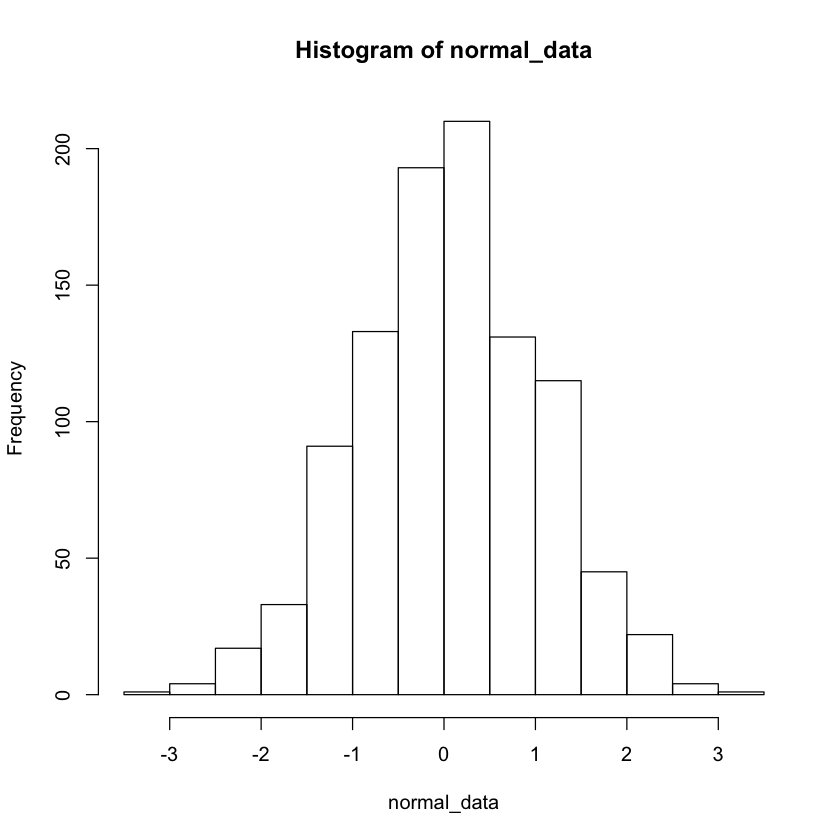

In [5]:
hist(normal_data)

## 1.2 Histogram of population and sample

### 1.2.1 Sample with random draws from population
- `function:` sample(DATA_NAME, "# of data")
    - Plots histogram

In [6]:
sample_data = sample(normal_data, 300)

### 1.2.2 Graph data

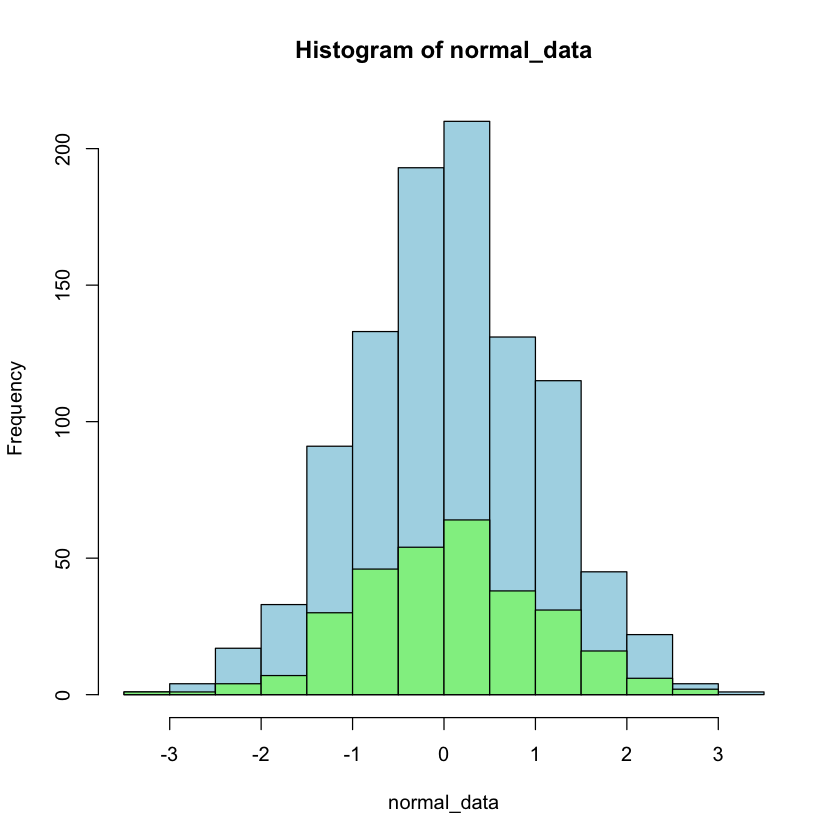

In [7]:
hist(
    normal_data,#Data
    col='lightblue', #Color
    breaks=20, #Bins
)
hist(
    sample_data,#Data
    col= 'lightgreen', #Color
    breaks=20, #Bins
    alpha=.3,
    add=TRUE
)

<a id='Section_2'></a>
## 2. Visualizing data

## 2.1 Scatter plots

### 2.1.1 Download data from online csv

In [8]:
#Download data from github
covid_data_url = "https://raw.githubusercontent.com/corybaird/Development_economics/master/TA_Sessions/R/W3_ggplot/global_covid.csv"
#Download
covid = read.csv(covid_data_url)

### 2.1.2 Use head function to look at first two rows
- `function:` head(DATA_NAME, #_ROWS)
    - Shows only specific number of rows
    - Default is 5

In [9]:
covid %>% head(2)

X,name,confirm,suspect,dead,deadRate,showRate,heal,healRate,showHeal
1,China,83039,88,3340,4.02,FALSE,77361,93.16,TRUE
2,United States,143071,0,2513,1.76,FALSE,4856,3.39,FALSE


### 2.1.3 Graph

#### 2.1.3.1 Using plot command

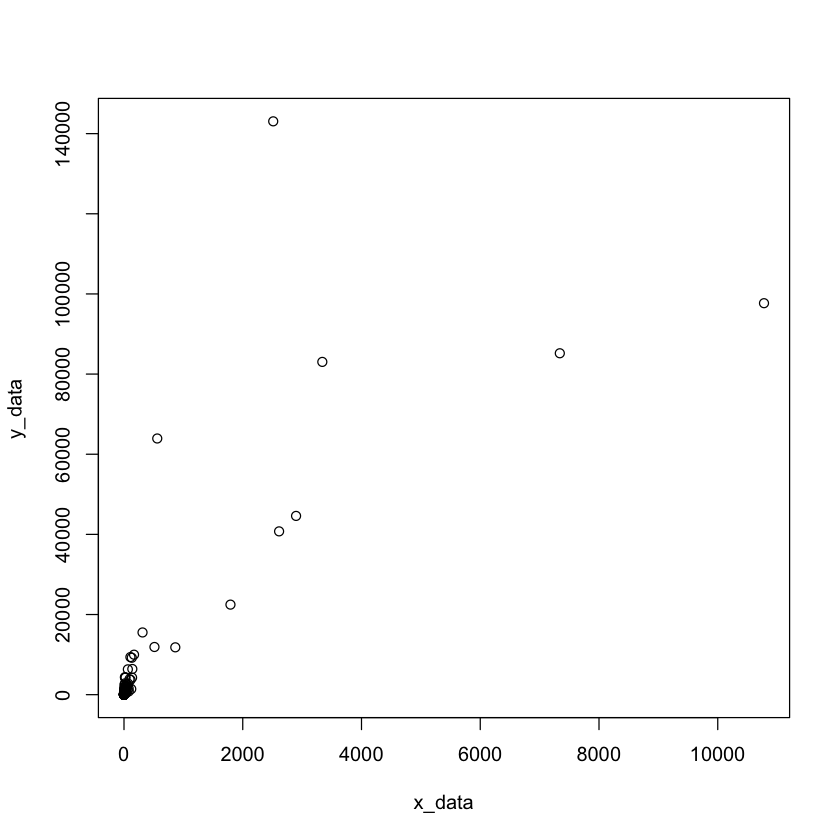

In [10]:
x_data = covid$dead #Selects dead column from dataframe
y_data = covid$confirm #Selects confirm column from dataframe
plot(x_data, y_data)

#### 2.1.3.2 Using ggplot library's command
- In R there is always multiple ways to graph, manipulate data, build models!

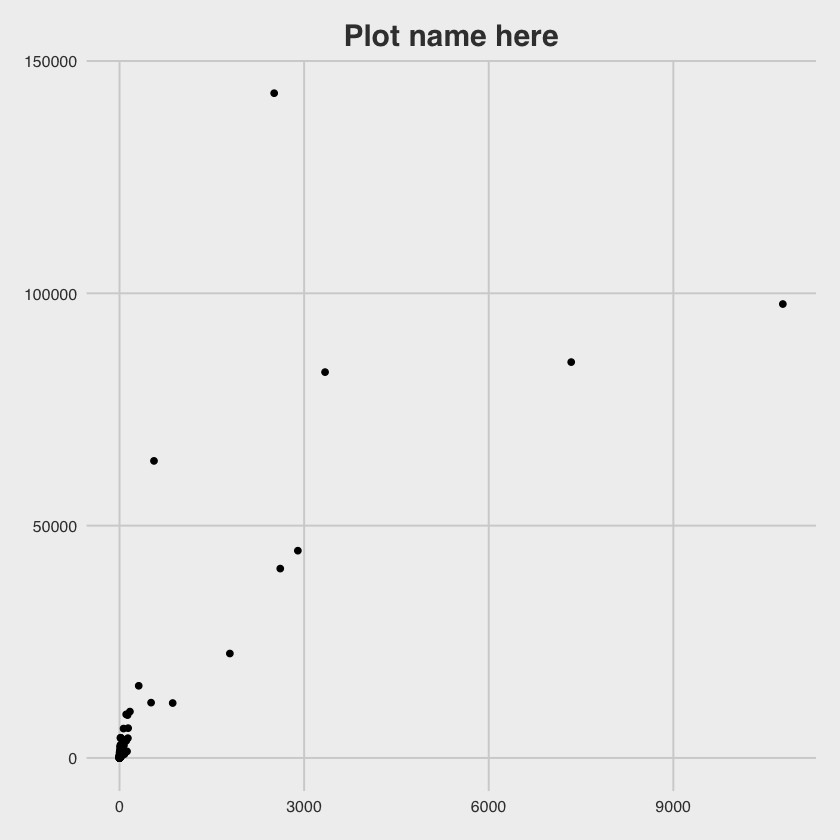

In [11]:
ggplot(covid, aes(x = dead, y = confirm)) + #Chooses the data by column name
geom_point()+ #Plots the points
ggtitle('Plot name here')+ #Plot title
scale_color_fivethirtyeight("cyl") + #Sets the plot theme
theme_fivethirtyeight()+theme(plot.title = element_text(hjust = 0.5)) #Sets the plot theme

## 2.2 Histogram with varying bin size 
- Same data but it looks vastly different based on bin size

### The graphs all look different yet the data is the same!

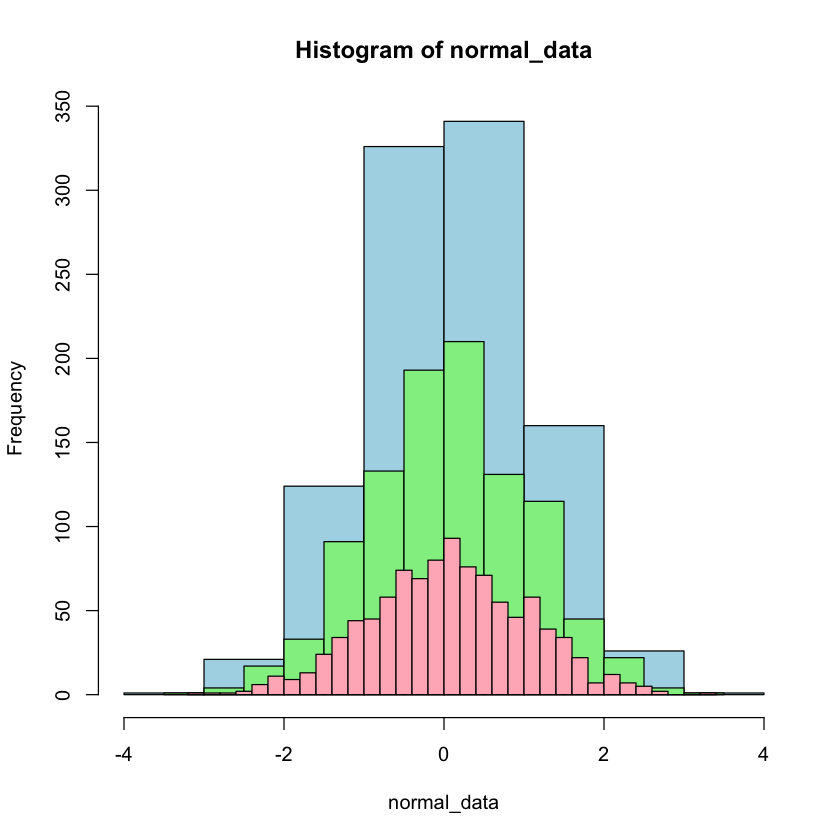

In [12]:
hist(
    normal_data,#Data
    col='lightblue', #Color
    breaks=5, #Bins
)
hist(
    normal_data,#Data
    col= 'lightgreen', #Color
    breaks=20, #Bins
    alpha=.3,
    add=TRUE
)
hist(
    normal_data,#Data
    col= 'lightpink', #Color
    breaks=40, #Bins
    alpha=.3,
    add=TRUE
)

<a id='Section_3'></a>

# 3. Describing distributions

## 3.1 Peaks modes

### 3.1.1 Bimodal

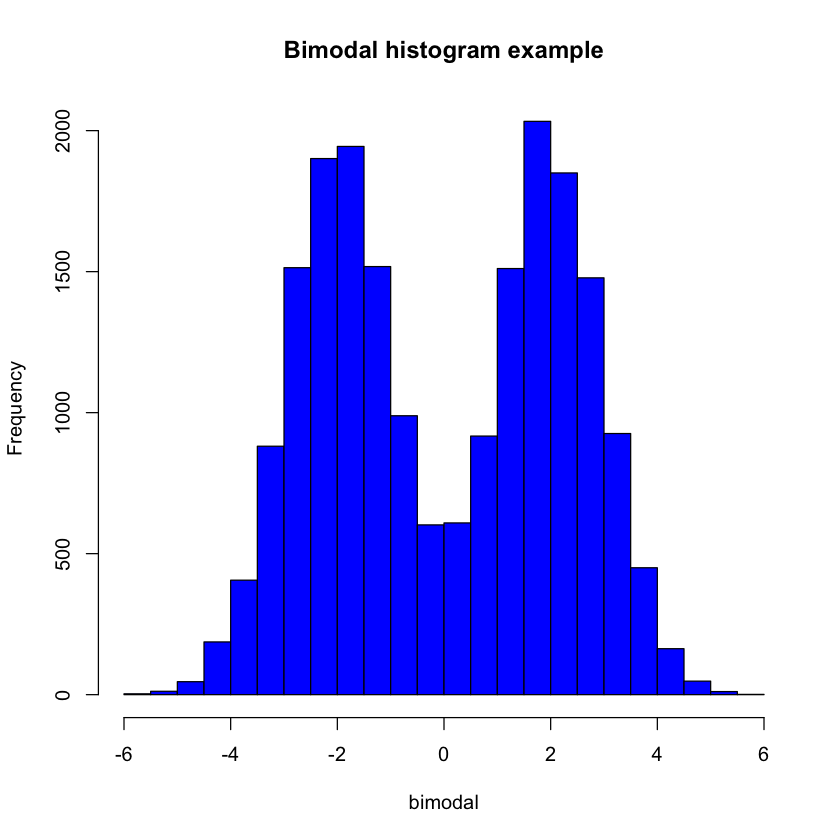

In [13]:
#Creates bimodal data with one peaks at 2,-2.
bimodal = c(rnorm(10000, mean = -2, sd = 1), rnorm(10000, mean = 2, sd = 1)) 
#Plots data
hist(
    bimodal,#Data
    col='blue', #Color
    breaks=40, #Bins
    main='Bimodal histogram example'
)

### 3.1.2 Trimodal

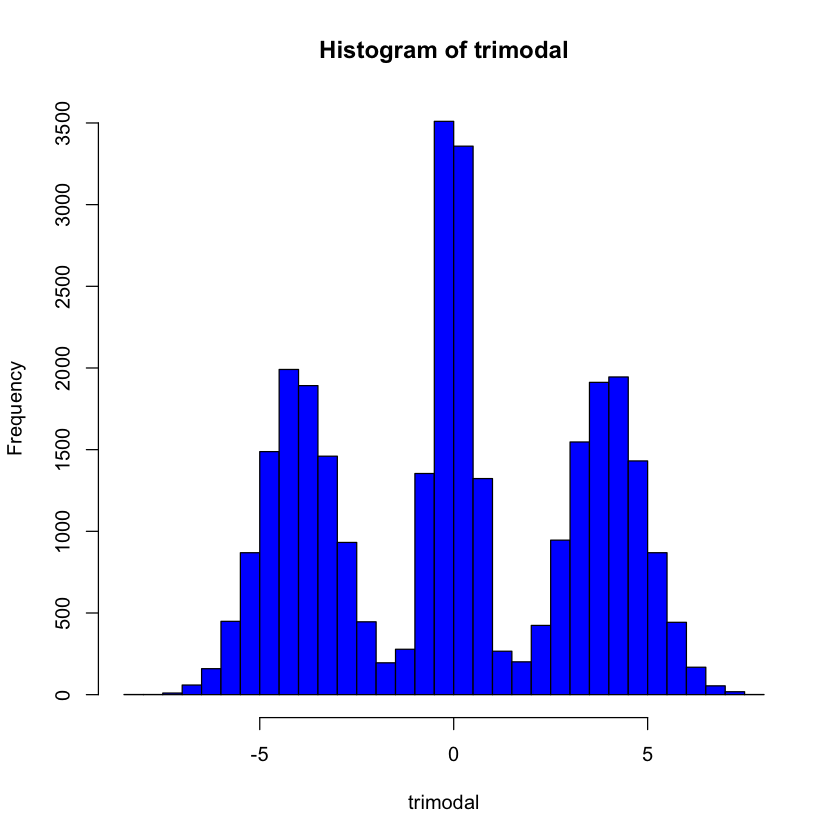

In [14]:
#Generates data
trimodal = c(rnorm(10000, mean = -4, sd = 1),rnorm(10000, mean = 0, sd = .5), rnorm(10000, mean = 4, sd = 1)) 
#Plots data
hist(
    trimodal,#Data
    col='blue', #Color
    breaks=40 #Bins
)

## 3.2 Skew

### 3.2.1 Download data

In [15]:
library(gapminder)
gapminder %>% head(2)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530


### 3.2.2 Create mean and median from data
- `function:`mean(DATA_FRAME\$COlUMN_NAME)
- `function:`median(DATA_FRAME\$COlUMN_NAME)


In [16]:
mean_life = mean(gapminder$lifeExp)
median_life = median(gapminder$lifeExp)

### 3.2.3 Graph data

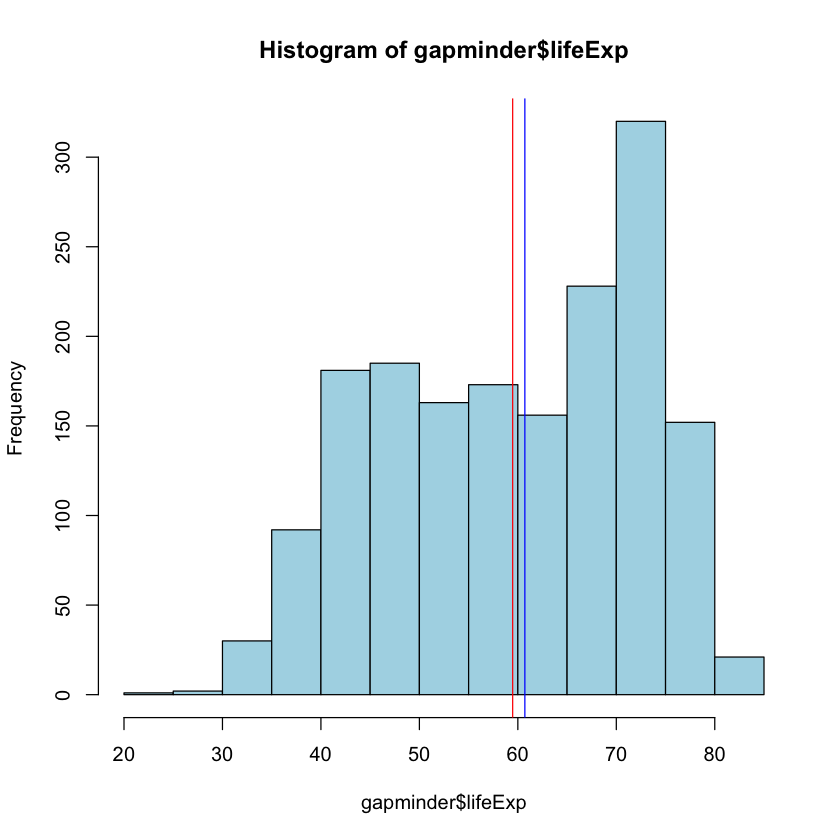

In [17]:
hist(
    gapminder$lifeExp,#Data
    col='lightblue', #Color
    breaks=20, #Bins
)
#One standard deviation line
abline(v=mean_life, 
       col="red")
abline(v=median_life, 
       col="blue")

### 3.2.4 Graph data: same as 3.2.3 but with ggplot2 library

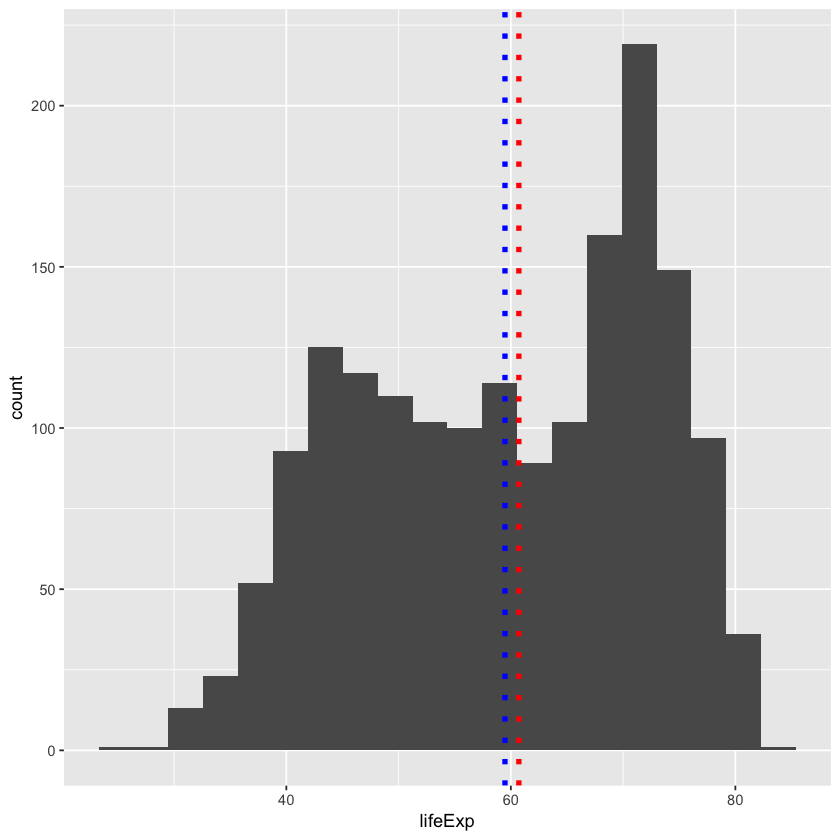

In [18]:
gapminder  %>% #Plot normal_data
ggplot(aes(x=lifeExp))+ #Selects data column by name
geom_histogram(bins=20)+ #Plots histogram
geom_vline(xintercept =mean_life , linetype="dotted", color = "blue", size=1.5, show.legend=TRUE)+ #Plots mean line
geom_vline(xintercept =median_life , linetype="dotted", color = "red", size=1.5, show.legend=TRUE) #Plots median line

### 3.3 Measuring spread

### 3.3.1 Calculate the interquartile range 


In [19]:
# Select Asian countries in 2007 data 
asia_data = gapminder %>% filter(year==2007&continent=='Asia')  %>% select(lifeExp)

In [20]:
# Calculate IQR
IQR(asia_data$lifeExp)

[1] 10.152

### 3.3.2 Plot boxplot

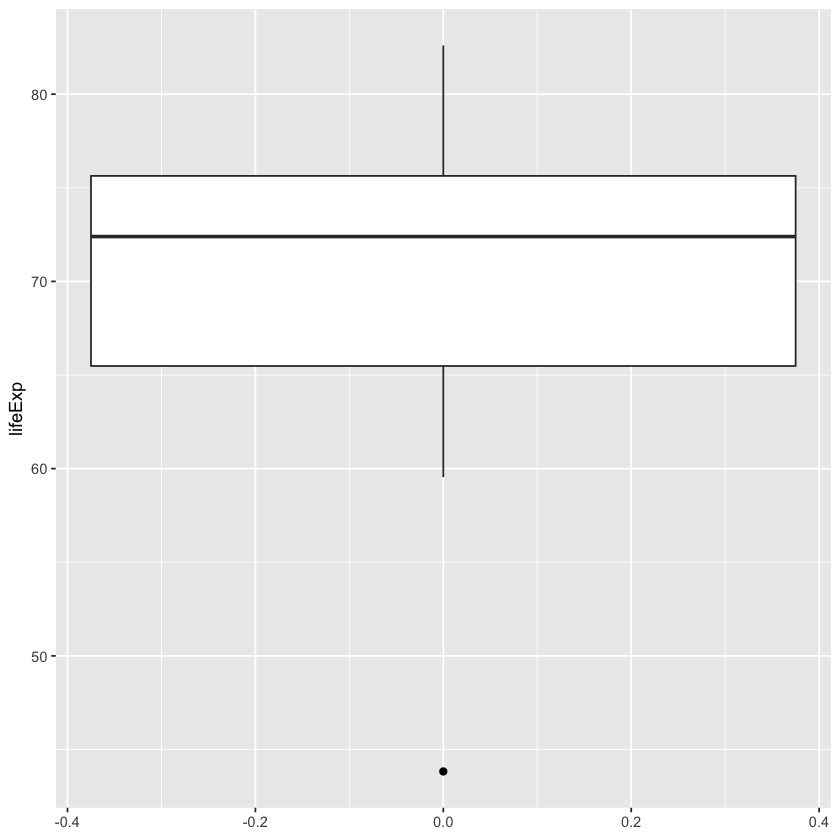

In [21]:
asia_data %>% 
ggplot(aes(y=lifeExp)) + 
geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2)

## 3.4 Standard deviation

### 3.4.1 Standard deviation formula

$$s^2 = \frac{1}{n-1}\sum^{n}_{i=1}(x_i-\bar{x})^2$$

#### 3.4.1.1 Create random xis

In [22]:
xi = sample.int(10, 10)
xi

[1]  4  7  8  2  6  9 10  3  1  5

#### 3.4.1.2 Convert the xis into dataframe
- Open [this](https://github.com/corybaird/PLCY_610_public/blob/master/Discussion_sections/Disc1_Intro/Disc1_intro.ipynb) lesson for more information on dataframes

In [23]:
xi_df = as_tibble(xi) %>% rename(xi=value)
xi_df

xi
4
7
8
2
6
9
10
3
1
5


#### 3.4.1.3 Calculate deviations from mean

$$x_i-\bar{x}$$

In [24]:
# You can create a new column using the following code: Dataframe$New_column_name
xi_df$xi_mean = mean(xi_df$xi)

In [25]:
xi_df$deviation = (xi_df$xi-xi_df$xi_mean)^2
xi_df

xi,xi_mean,deviation
4,5.5,2.25
7,5.5,2.25
8,5.5,6.25
2,5.5,12.25
6,5.5,0.25
9,5.5,12.25
10,5.5,20.25
3,5.5,6.25
1,5.5,20.25
5,5.5,0.25


#### 3.4.1.4 Sum the deviations

In [26]:
xi_df$xi_sum = sum(xi_df$deviation)
xi_df

xi,xi_mean,deviation,xi_sum
4,5.5,2.25,82.5
7,5.5,2.25,82.5
8,5.5,6.25,82.5
2,5.5,12.25,82.5
6,5.5,0.25,82.5
9,5.5,12.25,82.5
10,5.5,20.25,82.5
3,5.5,6.25,82.5
1,5.5,20.25,82.5
5,5.5,0.25,82.5


#### 3.4.1.5 Calculate n (this is simply the length of data a.k.a number of observations

In [27]:
xi_df$n = length(xi_df$xi)
xi_df

xi,xi_mean,deviation,xi_sum,n
4,5.5,2.25,82.5,10
7,5.5,2.25,82.5,10
8,5.5,6.25,82.5,10
2,5.5,12.25,82.5,10
6,5.5,0.25,82.5,10
9,5.5,12.25,82.5,10
10,5.5,20.25,82.5,10
3,5.5,6.25,82.5,10
1,5.5,20.25,82.5,10
5,5.5,0.25,82.5,10


#### 3.4.1.6 Calculate the variance and standard deviation

In [28]:
xi_df$variance = xi_df$xi_sum/(xi_df$n-1)
xi_df

xi,xi_mean,deviation,xi_sum,n,variance
4,5.5,2.25,82.5,10,9.166667
7,5.5,2.25,82.5,10,9.166667
8,5.5,6.25,82.5,10,9.166667
2,5.5,12.25,82.5,10,9.166667
6,5.5,0.25,82.5,10,9.166667
9,5.5,12.25,82.5,10,9.166667
10,5.5,20.25,82.5,10,9.166667
3,5.5,6.25,82.5,10,9.166667
1,5.5,20.25,82.5,10,9.166667
5,5.5,0.25,82.5,10,9.166667


In [29]:
xi_df$standard_deviation = sqrt(xi_df$variance)
xi_df

xi,xi_mean,deviation,xi_sum,n,variance,standard_deviation
4,5.5,2.25,82.5,10,9.166667,3.02765
7,5.5,2.25,82.5,10,9.166667,3.02765
8,5.5,6.25,82.5,10,9.166667,3.02765
2,5.5,12.25,82.5,10,9.166667,3.02765
6,5.5,0.25,82.5,10,9.166667,3.02765
9,5.5,12.25,82.5,10,9.166667,3.02765
10,5.5,20.25,82.5,10,9.166667,3.02765
3,5.5,6.25,82.5,10,9.166667,3.02765
1,5.5,20.25,82.5,10,9.166667,3.02765
5,5.5,0.25,82.5,10,9.166667,3.02765


#### 3.4.1.7 The above calculation is simply for learning purposes and can be easily achieved using R functions

In [30]:
sd(xi_df$xi)

[1] 3.02765

In [31]:
var(xi_df$xi)

[1] 9.166667

<a id='Section_4'></a>

# 4. Normal distribution

## 4.1 Basic example

### 4.1.1 Generate data
- Using rnorm function from 1.1

In [32]:
normal_zero_one = rnorm(1000, mean = 0, sd = 1)
normal_two_one = rnorm(1000, mean = 2, sd = 1)
normal_zero_twofive = rnorm(1000, mean = 0, sd = .25)

### 4.1.1.2 Graph normal distributions

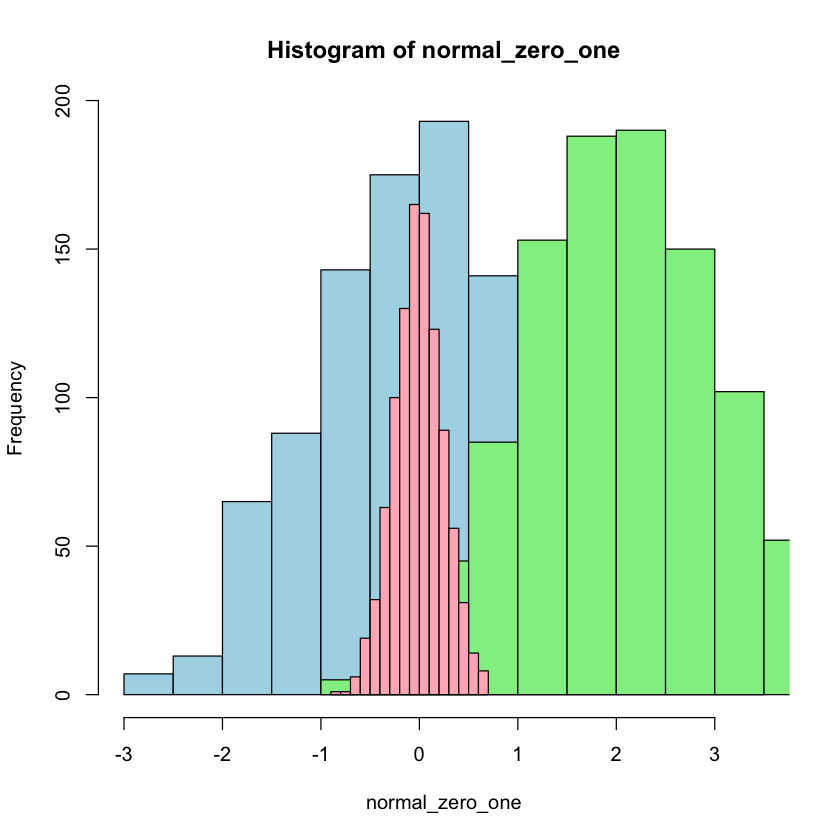

In [33]:
hist(
    normal_zero_one,#Data
    col='lightblue', #Color
    breaks=20, #Bins
)
hist(
    normal_two_one,#Data
    col= 'lightgreen', #Color
    breaks=20, #Bins
    alpha=.3,
    add=TRUE
)
hist(
    normal_zero_twofive,#Data
    col= 'lightpink', #Color
    breaks=20, #Bins
    alpha=.3,
    add=TRUE
)

## 4.2 Cumulative proportions

In [34]:
normal_zero_one = rnorm(1000, mean = 0, sd = 1)
normal_zero_one_sd = sd(normal_zero_one)

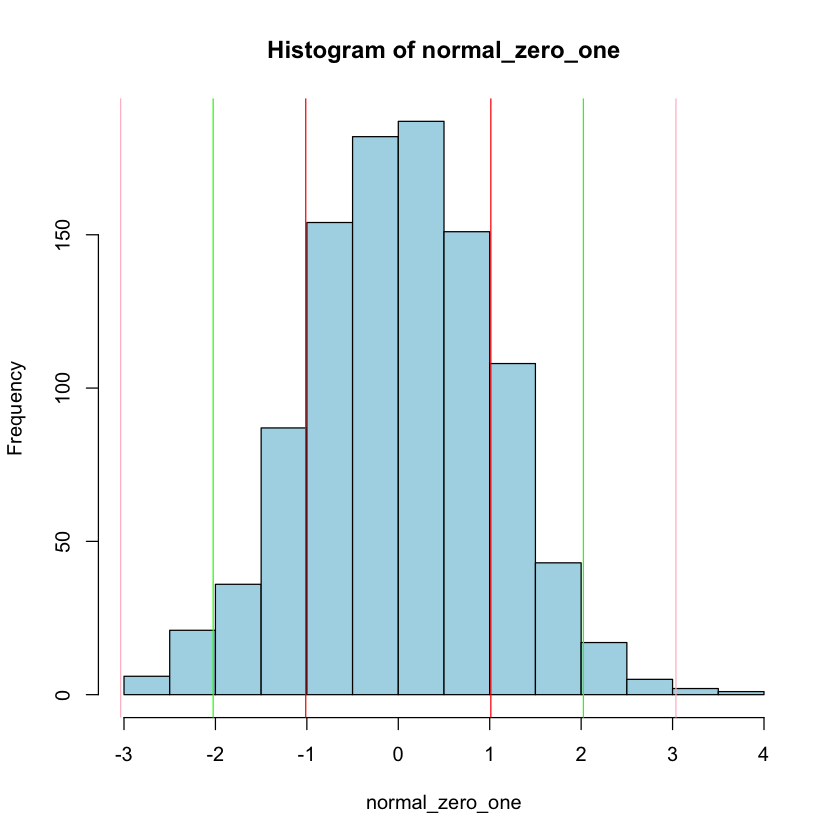

In [35]:
hist(
    normal_zero_one,#Data
    col='lightblue', #Color
    breaks=20, #Bins
)
#One standard deviation line
abline(v= (normal_zero_one_sd), 
       col="red")
abline(v= (-normal_zero_one_sd), 
       col="red")
#Two standard deviation line
abline(v= (normal_zero_one_sd*2)
       , col="green")
abline(v=(-normal_zero_one_sd*2), 
       col="green")
#Three standard deviation line
abline(v=(normal_zero_one_sd*3), 
       col="pink")
abline(v=(-normal_zero_one_sd*3), 
       col="pink")

## 4.3 Z-score

### 4.3.1 Plot normal distribution: $\mu=100, \sigma=5$

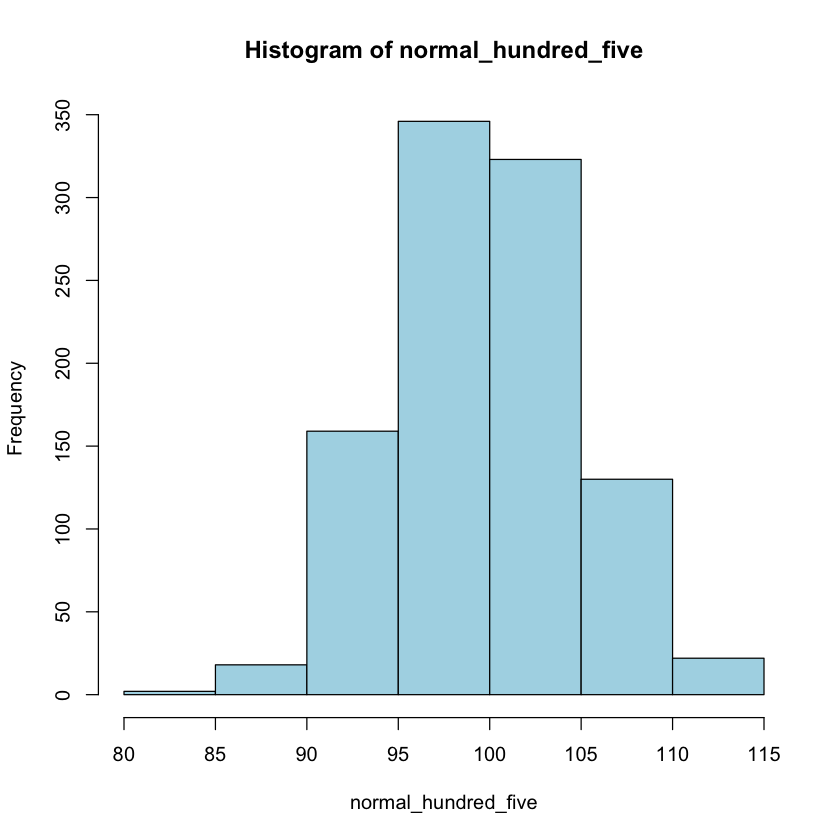

In [36]:
#Generate data
normal_hundred_five = rnorm(1000, mean = 100, sd = 5)
#Plot data
hist(
    normal_hundred_five ,#Data
    col='lightblue', #Color
)

### 4.3.2 Standardize the above graph in 4.3.1

In [37]:
normal_hundred_five_mean = mean(normal_hundred_five)
normal_hundred_five_sd = sd(normal_hundred_five)

In [38]:
z = ((normal_hundred_five-normal_hundred_five_mean)/(normal_hundred_five_sd))

#### 4.3.2.1 Plot standardized data

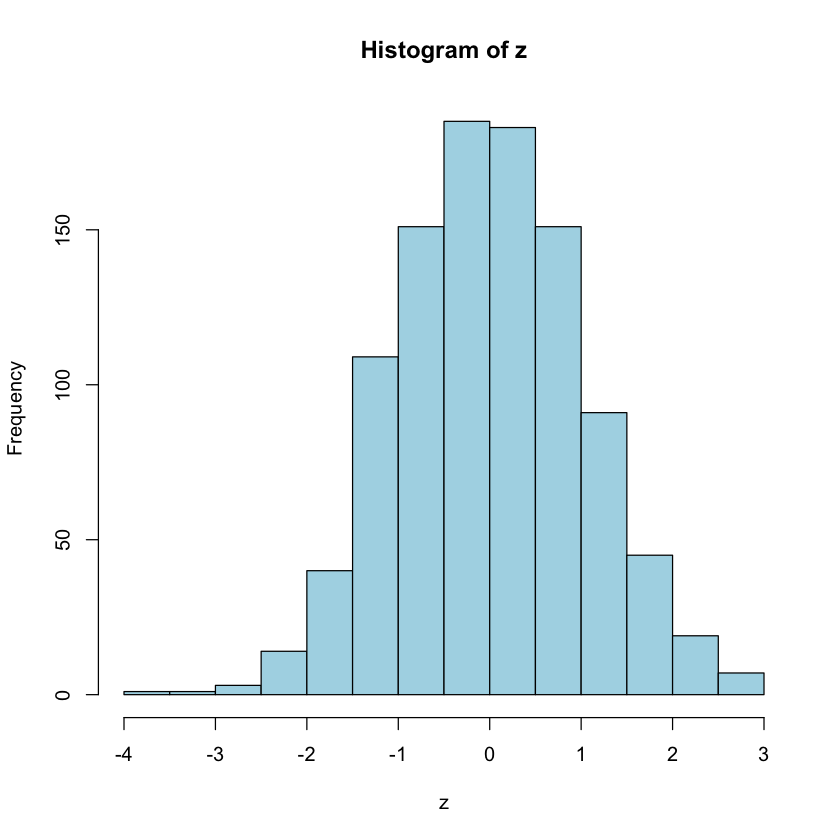

In [39]:
hist(
    z ,#Data
    col='lightblue', #Color
)

## 4.4 Standard normal probabilities

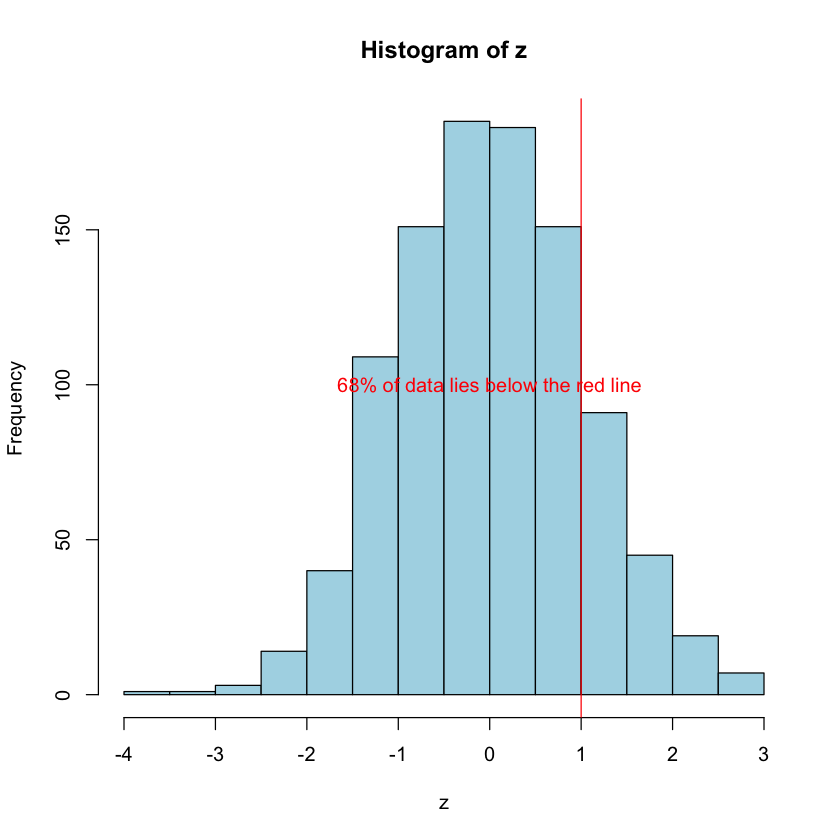

In [40]:
hist(
    z,#Data
    col='lightblue', #Color
)
abline(v= sd(z), 
       col="red")
text(0, 100,
     "68% of data lies below the red line",
    col='red')